In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from KNN import majority_vote

Exercise 1: Plotting the starting values

In [6]:
microchips = pd.read_csv('A1_datasets/microchips.csv', header=None)
xdata =  microchips.iloc[:, 0]
ydata =  microchips.iloc[:, 1]
okOrFailedVector = microchips.iloc[:, 2]

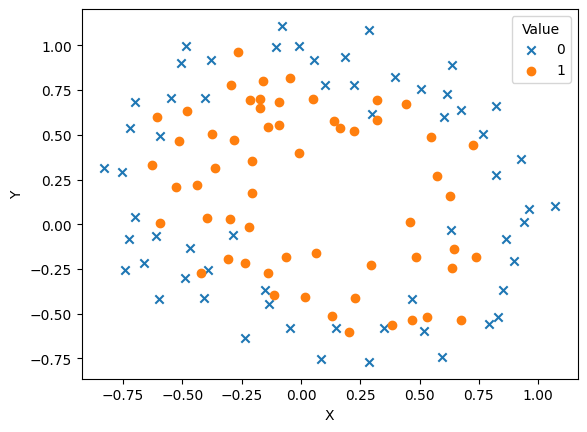

In [7]:
markers = {1: 'o', 0: 'x'}
for value in set(okOrFailedVector):
    mask = (value == okOrFailedVector)
    plt.scatter(xdata[mask], ydata[mask], marker=markers[value], label = value)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title= 'Value')
plt.show()

In [33]:
TRAIN_data = np.array(microchips.iloc[:, :2].values)
TRAIN_labels = np.array(microchips.iloc[:, 2].values)
test_chips = np.array([[-0.3, 1.0],
                       [-0.5, -0.1],
                       [0.6, 0.0]])
k_values = [1, 3, 5, 7]

distances = np.sqrt(np.sum((test_chips[:, np.newaxis, :] - TRAIN_data)**2, axis=-1))
sorted_distances = np.sort(distances, axis=1)
sorted_indices = np.argsort(distances, axis=1)
sorted_labels = TRAIN_labels[sorted_indices]

A loop calculating KNN for each K value.

In [45]:
for k in k_values:
    closest_neighbour = []
    print("K value = {}".format(k))
    for i in range(len(test_chips)):
        coords_str = ', '.join([f"{coord: 0.1f}" for coord in test_chips[i]])
        if k == 1:
            closest_neighbour = sorted_labels[:, k-1]
            label = "OK" if closest_neighbour[i] == 1 else "FAIL"
        else:
            closest_neighbour = sorted_labels[:, :k]
            prediction = majority_vote(closest_neighbour[i])
            label = "OK" if prediction == 1 else "FAIL"
        print(f"chip{i + 1}: [{coords_str}] ==> {label}")

K value = 1
chip1: [-0.3,  1.0] ==> OK
chip2: [-0.5, -0.1] ==> FAIL
chip3: [ 0.6,  0.0] ==> FAIL
K value = 3
chip1: [-0.3,  1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> FAIL
chip3: [ 0.6,  0.0] ==> OK
K value = 5
chip1: [-0.3,  1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> OK
chip3: [ 0.6,  0.0] ==> OK
K value = 7
chip1: [-0.3,  1.0] ==> FAIL
chip2: [-0.5, -0.1] ==> FAIL
chip3: [ 0.6,  0.0] ==> OK
